# Classification using Keras (Fashion MNIST)

In [0]:
#imports
from keras.datasets import fashion_mnist
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import SparseCategoricalCrossentropy
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#train/test data from fashion mnist
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

In [196]:
#number of classes
len(set(ytrain))

10

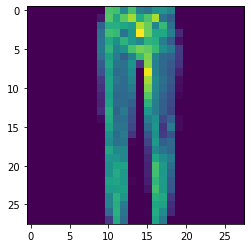

In [197]:
#random image from training dataset
plt.imshow(xtrain[np.random.randint(len(xtrain))])

In [0]:
#normalisation of images
xtrain = xtrain/225 - 0.5
xtest = xtest/225 - 0.5

In [0]:
#our model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
#compile
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

In [201]:
#fitting our model to training data
history = model.fit(xtrain, ytrain, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 91us/step - loss: 1.6599 - accuracy: 0.8079
Epoch 2/10
60000/60000 [==============================] - 5s 86us/step - loss: 1.6175 - accuracy: 0.8458
Epoch 3/10
60000/60000 [==============================] - 5s 87us/step - loss: 1.6076 - accuracy: 0.8546
Epoch 4/10
60000/60000 [==============================] - 5s 89us/step - loss: 1.5986 - accuracy: 0.8633
Epoch 5/10
60000/60000 [==============================] - 5s 89us/step - loss: 1.5938 - accuracy: 0.8678
Epoch 6/10
60000/60000 [==============================] - 5s 90us/step - loss: 1.5878 - accuracy: 0.8741
Epoch 7/10
60000/60000 [==============================] - 5s 85us/step - loss: 1.5841 - accuracy: 0.8778
Epoch 8/10
60000/60000 [==============================] - 5s 85us/step - loss: 1.5811 - accuracy: 0.8806
Epoch 9/10
60000/60000 [==============================] - 5s 86us/step - loss: 1.5778 - accuracy: 0.8838
Epoch 10/10
60000/60000 [==============================

In [202]:
#model evaluation for loss & accuracy
model.evaluate(xtest, ytest)

10000/10000 [==============================] - 0s 28us/step


[1.593724610900879, 0.8680999875068665]

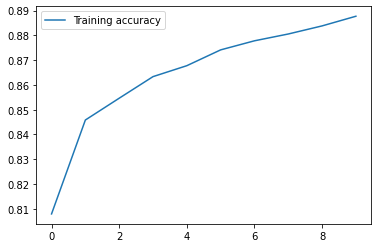

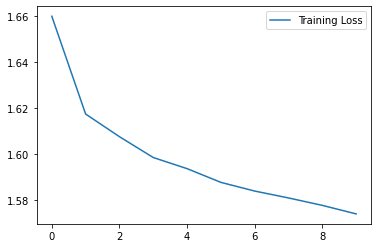

In [203]:
#plotting loss & accuracy
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, label='Training accuracy')
plt.legend(loc='best')
plt.show()
plt.plot(epochs, loss, label='Training Loss')
plt.legend(loc='best')
plt.show()

In [0]:
#labels of the classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

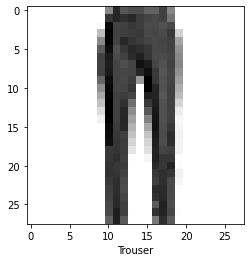

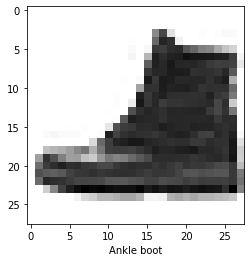

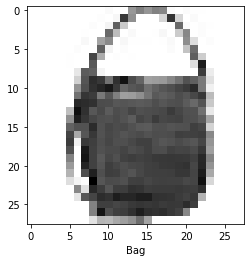

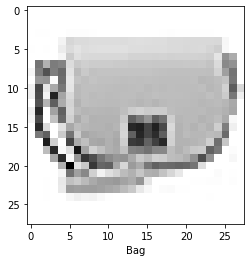

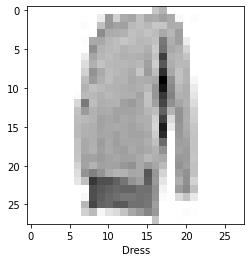

In [207]:
#printing 5 different random test predictions
for x in range(5):
    i = np.random.randint(len(xtest))
    plt.imshow(xtest[i], cmap='binary')
    plt.xlabel(classes[np.argmax(model.predict(np.expand_dims(xtest[i],0)))])
    plt.show()